## 3 va 7

In [1]:
import torch
import fastai

3 yoki 7 https://jovian.com/outlink?url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FMNIST_database

O'sha mashhur MNIST dataseti haqida:

Bu darsimizda, computer vision sohasidagi mashhur datasetlarda biri MNIST dan foydalanamiz. Bu dataset qo'lda yozilgan raqamlar jamlamasidan iborat dataset hisoblanadi. Bu ma'lumotlar to'plami National Institute of Standarts and Technology tomonidan jamlangan va Machine Learning sohasiga Yann Lecun va uning jamoasi tomonidan qo'llanilgan.

Ma'lumot: Barcha rasmlar 28 x 28 o'lchamdagi piksellardan iborat.

In [2]:
# MNIST datasetidagi faqat 3 va 7 sonlarini ajratib olingan datasetni yuklab olamiz.

from fastai.vision.all import *

# path
path = untar_data(URLs.MNIST_SAMPLE)

threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [3]:
im3_sample = threes[1]
im3 = Image.open(im3_sample)
im3

In [4]:
im7_sample = sevens[2]
im7 = Image.open(im7_sample)
im7

Rasmdagi raqamlar bizga rasm bo'lib ko'ringani bilan, kompyuterlarda inosnlar kabi ko'rish qobilyati mavjud emas. Qiziq, kompyuterlar bu raqamlarni qanday ko'rinishda ko'rar ekan? Javob: Kompyuterlar, rasmlarni raqamlar iborat to'plam sifatida ko'radi. Bunda har bir raqam mahsus rangni ifodalab keladi.

In [5]:
tensor(im3)[4:10, 4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [13]:
import pandas as pd

im3_t = tensor(im3)
df = pd.DataFrame(im3_t[3:26,3:23])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

**Piksellar o'xshashligi**

Bu masalani, piksellar o'xshashligi orqali yechib ko'rish mumkin. Ya'ni, barcha 3 ga tegishli rasmlardan foydalanib o'rtacha holatda 3 (ideal "3" deb ataylik) raqami qanday bo'lishi topilib undan keyin berilgan ma'lumotlarimizni ideal "3" raqamiga solishtirib 3 yoki 3 emasligini bashorat qilish mumkin. Huddi shu jarayon 7 uchun ham takrorlanadi

In [14]:
""" Barcha rasmlarni tensorlar ko'rinishiga keltirib, ularni listga joylab olamiz"""
three_tensors = [tensor(Image.open(i)) for i in threes]
seven_tensors = [tensor(Image.open(i)) for i in sevens]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

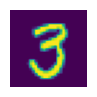

In [15]:
show_image(three_tensors[2])

**Stacking**


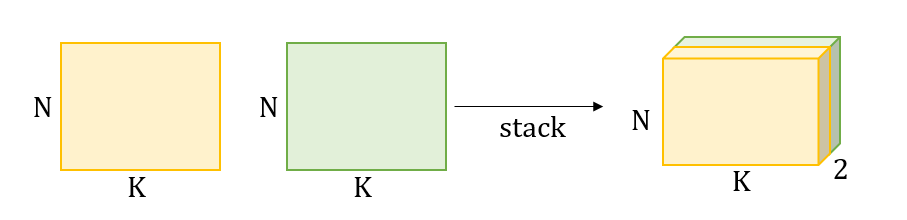

In [17]:
from IPython.display import Image
Image(url='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA4sAAADcCAIAAABWEqPmAAAUq0lEQVR4nO3df2ic950n8K9yvSPLcc3JY5ZeyfaMRmEppSe1jJuSSrSmOJ44UNqmnOTGLFkKtTWF0OQPyZW2bMBYOTndGEKrH8Y5wuGrRzRtQ2m0mpriLhJlHavBQ1O2JRqVhm5SqMdDL1s2S2+r++O5DlNJzjqxNM93Hr1ef33nmUejD/LX1tvf5/l8n6719fUAAADRuC3tAgAA4I9IqAAAxEVCBQAgLhIqAABxkVABAIiLhAoAQFwkVAAA4iKhAgAQFwkVAIC4SKgAAMRFQgUAIC4SKgAAcZFQAQCIi4QKAEBcJFQAAOIioQIAEBcJFQCAuEioAADERUIFACAuEioAAHGRUAEAiIuECgBAXCRUAADiIqECABAXCRUAgLhIqAAAxEVCBQAgLhIqAABxkVABAIiLhAoAQFwkVAAA4iKhAgAQFwkVAIC4SKgAAMRFQgUAIC7vSLsAACAF1X9c+l8v/I/fr/9r2oWwzc58ejHtEraBNVQA2HXEUyJnDRUAdpdmPN3/Xz/+8T//72mXw6367b/8n/+98jfXf/urtAvZTtZQAWAXEU8zphlP/+O/+89p17KdJFQA2C3E04xpjaf77/hE2uVsJwkVAHYF8TRjNsTT/3Dbn6Rd0XbqzPtQ/64r7QrYYR9dT7uCW/XIt4ppl8DOyka3LLuHeJox2Y6nwRoqAGSeeJoxmY+noVPXUBMfXEm7AnbAi4W0K9hOj378qbRLYPs9+f2H0y4B3gLxNGN2QzwN1lABIMPE04zZJfE0dPYaKgBwY7/42cn3/+qv/2bPeggh/FMl/Gg07YrYBl++PfzVG0PZjqfBGioAZNIvfnbyz37117eFjm88ZbPMx9NgDRUAMujXz/7/ePquvwh/diLtarhlv7sWfvpQeGMteZX5eBqsoQJA1vz62fAPR8TT7PhDPH2j691pl9I+EioAZMivnw3/cCSs/1/xNCNa4unLt02kXU37SKgAkBXiacb8cTz9Xbgj7YLaR0IFgEwQTzNmF8fTIKECQBaIpxmzu+NpkFABoOOJpxmz6+NpkFABoLOJpxkjnoYQJFQA6GDiacaIp39gx34A6EzNePrv94bb/lP4x6+lXRC37PrfiqcJCRUAOlMST0MIv7sWXhVPM0I8TUioANCZknj6Xz6fdh1sk3/6UXj9R43wYfE0SKgA0Nkk1Mx47Wx4/UdpFxELnVIAAMRFQgUAIC4SKgAAcZFQAQCIi4QKAEBcJFQAAOIioQIAEBcJFQCAuEioAADERUIFACAuEioAAHGRUAEAiIuECgBAXCRUAADiIqECABAXCRUAgLhIqAAAxEVCBQAgLhIqAABxkVABAIiLhAoAQFwkVAAA4iKhAgAQFwkVAIC4SKgAAMRFQgUAIC4SKgAAcZFQAQCIi4QKAEBcJFQAAOIioQIAEBcJFQCAuEioAADERUIFACAuEioAAHGRUAEAiEubEmqpVOr6gz179qytrW0+p7e3t/WcarXantogYZYCQCTalFCnp6dnZ2eTcaPRKJVKm89ZXV0dGhoKIeTz+Zdffrmvr689tUHCLAWASLTvKv/Bgweb40qlsrCwsPmcT37ykyGEe++9N5fLta0waDJLASAG7UuoPT09IYR8Pt/d3R1CePjhh+v1+oZz7rzzzhDCvn372lYVtDJLASAG7e6U6u3tPXHiRAihVqs9/fTTbf7ucDPMUsiqq1evpl0CcFNS6OX/3Oc+l8/nQwhjY2NbNqNA6sxSyKRHHnnkAx/4wHPPPZd2IcC/IYWEmsvlnnrqqWS8ZTMKpM4shay6evXqpz71KTkVIpfOfqiHDx8+dOhQuHEzCqTOLIUMk1Mhcqnt2D89PZ0MtmxGgRiYpZBtcipEK7WE2tPTMzU1FTSjEDGzlLfqscce6yJiP/jBDzb/qSU59b777nvjjTfaP2eALaX51FPNKMTPLOUteeyxx9aJ2Mc+9rHNf2rvete7zpw58+1vf/v2229v/5wBtpRmQtWMQvzMUsiwJJv+/Oc//+IXvyieQlTSTKhBMwqdwCyF7JFNIXIpJ9Twx80o6VYCN2KWQma0P5uWy+XWe2G3/I9uqVRqPadcLrehMIhZ+gm1tRnl61//etrlwBbMUsiGsbGx9q+bDg8Ptz7L6ujRo5v3Bpmenp6dnU3GV69eHR4eblt5EKf0E2poaUaZmZlJuxbYmlkKGVAsFlO5pt/X15f8AxJCaDQaTz755OZzDh48GELI5/N9fX1tLQ6iFEVCbW1GgTiZpcCt6O3tDSEUCoUQwuTkZLVa3XBCT09P8zSgfQk12alndXV1y3ebzSiQIrMU2FFnzpxJBmNjY+lWApFrX0K9ePFiCKFWq23+j2Oi2YwCaTFLgR01MDAwNDQUQqhUKtqh4E20KaGWSqXjx48n4/7+/i3/WjabUSAVZim0QW9vb7NjfXl5Oe1yUjA5Odnd3R1CKJVKHqcMN9KmhDo9Pd36VI8bdSmOjo6ur6+Pjo62pypoZZZCG6yuro6Pj6ddRZp6enpOnDgRbtwyBYRIOqUA2D3uu+++tEtI2ejoaNLav2XLFBAkVAD27Nmza6+5p+WZZ55JBlqmYEsSKsBu12g00i5h19EyBW9OQgXY1SydpkXLFLwJCRVgV/Mg37RomYI3IaECZNba2trExMT+/fubGzz19vYWi8WFhYUQQrVaLZVKzQf5Dg4OdrVo/ZyFhYVSqdT8nD179rzJsl+9Xj99+nTrNy0Wi6VSKXkixo20np/YDde+W1um3vznA7uNhAqQTdVqtVAoTE5O3nvvvUtLS0tLS1NTU9evX69UKi+99FII4fXXX9+3b9/IyEhy/sjIyFSL5ODCwkJvb+/9999//fr1M2fOLC0tjY+PNxqNmZmZBx98cMtvetddd42NjSXf9Pnnny8UCpVKZWZm5tVXX32Taq9cuZI8ETSEMDQ0dO3atRvt+JYxzZapr3zlK+lWAlF5R9oFALAjHnjggUajMT4+furUqeTIwMDAPffcMzg42Hw5MDCwvLycLKN+9rOfHRgY2PAhTz31VK1WO3ToUHNFMzlncnKyUqlUq9W+vr7myWtrawcOHGg0GrOzs8eOHUsO3n333Xv37r2ZgpOGrZGRkV318LakZWp+fr65mA0Ea6gAWVWr1UIId9xxR+vBgYGBt/HIiYcffrj1ZXND09dff731eKlUajQa+Xy+GU9DCLlcLmlaf3OlUqlWq83Ozu6qeJpotkwBTRIqQJadPXv2Vm5wXFxcXF9fP3z4cOvBd7/73cnghz/8YfPg2tpapVIJIWzOo+VyeX19ffMCbdPExMTMzMyFCxdao23GrK6uhhC2/LNotkwBTRIqQDYlDxet1WqFQmFiYmIbG3F6eno2H/zpT3+aDD7ykY/c/EfV6/VSqTQ5OXnhwoUM33harVaTJe2LFy9ueUKzZQpISKgA2XTq1Kmk4anRaExOTubz+WKx+PZ2P11bW5ubmyuVSsViMXkA1eZzku6rEMI73/nOm/zYwcHBvXv3JvdfvvLKK2+jsI5QLpf7+/uT8fHjx0ul0panNVumgCChAmTY6OhorVYbHx9PbnOsVCqDg4Nzc3M3/wnJGmc+n3/iiSe6u7sfeuih73znO0tLS9tS3tLS0rVr15LNBMbGxpI9sLJneHh4vcWNbrRNbhFeXFxsc3kQJwkVIMt6enpOnTp1/fr1CxcuJDn1+PHjN5kF6/V6sVicmZkZGRm5fPnyqVOnhoeHkx0ANp/cbMn65S9/efPl5XK5kydPJvtMHT161J6gQEJCBdgVhoeHL126lIy/+93v3syXXLx4cWVlJYRw8uTJXC7XPL5ljnzf+96XDH784x+/pcJyudz8/Hx3d3ej0RgaGvL8TyBIqACZdPr06a6urmq12nqwr6/v0KFDIYQt9zb6yU9+suFI897Q1ngaQnj22Wc3f/nAwEDysfPz81vW8ybRs6en5/z58yGElZWVL3/5yzc6Ddg9JFSAzHr88cdbX9br9RdeeCGE8P73v7958L3vfW8yeOKJJ5oh8vTp06Hlwn3rA0jn5ua+8Y1vbNl4nmyZVKvVWp+JWq/Xh4eHx8bGfvOb32w4v/V+gMOHDyebD8zMzLylO2WBTJJQATJrfn6+WCwuLCwsLy+Xy+VisdhoNAqFQuu+TrlcLulVqtVqd911V9Ktn+yievDgwWRZ9MiRI/v370/eOnfu3OLiYrJ30osvvtj67UZHR5PNUGdmZpKPKhaLe/fu/d73vvf8888396hq7qL63HPPtX75o48+mgyOHz/emomBXUhCBcigz3zmM1NTU4cOHXrhhRfuv//+wcHBI0eO5HK52dnZK1eubDj55MmTSb9/o9FYXV09ceLE5cuXe3p6enp6Ll26lITOlZWVer3++OOPX7lypXnRf35+vre3t/WjyuXyhQsXCoVCo9GoVCqrq6vj4+MrKyvNPf9LpdLY2NiWX956fT/JxNv9UwE6Rtf6+nraNbx1f9cVQggfXEm7DnbAi4UQQvhoB07LP/bIt4ohhEc//lTahbD9nvz+wyGEM5+2KxBp89swY147G147+1rXp1+77dM3OuWD/3o0hPC3Xd/a8t3vXZsLWfnXyRoqAABxkVABAIiLhAoAQFwkVAAA4iKhAgAQFwkVAKDj/eKf39oDhyMnoQIAdLZf/POPf/bbH4YQPvnfjqVdy/aQUAEAOlhrPP1o76fSLmd7SKgAAJ0qk/E0SKgAAB0qq/E0SKgAAJ0ow/E0SKgAAB0n2/E0SKgAAJ0l8/E0SKgAAJ0l8/E0SKgAAB0n2/E0SKgAAB3hT3+/mAwyH0+DhAoAEL8//f3inevnQwird/xl5uNpkFABACLXGk97+/9n2uW0wzvSLgAAgBtqxtOQP9N75xfTLqdNrKECAESqNZ6GXRNPg4QKABCnXRtPg4QKABChm4+n1Wr19OnTxWJxz549XV1dXV1dvb29pVJpeXm5TbXuAAkVACAuNxlP19bW9u/f39/fPzY21tPTc/78+aWlpdnZ2evXr8/MzAwODpbL5fYVva10SgEAROTmV09fffXVlZWVEMLs7OyxY8eSgwMDAx/+8If7+/tDCKVS6eDBg7lcbseL3m7WUAEAYtEd/v6t3ntaKBSa8TTR19c3MjISQmg0GpcvX96BMnechAoAEIvb118N4Wbj6cDAwPr6+pUrVza/tW/fvmTw0ksvbWuBbeIqPwB0shcLaVfAdtvWzv33vOc92/VR7WQNFQAgGtsUT1988cVk8KEPfejWP639rKECQGf66HraFRCptbW1+fn5EMLIyEhPT0/a5bwd1lABADJlfHw8hJDP50+ePJl2LW+ThAoAkB1zc3Pz8/Pd3d3f/OY3O3GfqUQnX+V3bzjRe/L7D6ddAgC7yPLy8vHjx7u7uy9dutTX15d2OW+fNVQAgCyoVquf+MQnQgjnz5/v6HgaQuhaX3efNQAQhXK5fOTIkdYjIyMj09PTzZe9vb21Wq35MgOLhdulWq0eOHCg0WhcuHBheHg47XJulYQKAESkWq0mT+wMISwtLQ0MDGw4oRlSh4aGvva1r3XurZbbqF6vF4vFlZWVbMTT4Co/ABCVvr6+Q4cOJePN8TSEcP369RDCyMhIuVwWTxMPPvjgysrK1NRUNuJpkFABgA4yNzfXaDQKhULn7qO07SYmJiqVysjIyOjo6Ia3FhYWyuVyKlXdIlf5AYC4FIvFSqUSQtiQUpIbAAqFwuLiotXTxPLy8uDgYD6fv3z58oafSb1ev/vuuwuFQieG1E7ebQoA2DXW1tYOHDjQ3d09Pz8vnjY98sgjIYRCofD0009veOvs2bO1Wu3zn/98GnXdKgk1Zc3Ou+aRfD6/urrafFkqlWZmZlq/JDM3QdMpzFIgdfV6fWhoKIRw6dKlDn2M504ol8srKyshhPn5+eQxp5nhPtSU9fX1vfzyy/l8Pnk5NTXV+os/hDA9PT0yMpKMC4XC1atX/eKnzcxSIF3NRnUbS23wyiuvpF3CTpFQ05fL5Zor8Pfcc8/mE5KmxeS2G38zSYVZCqRleXk5iaezs7P+edlgdHR0/d+yuX2qI7jKH7tqtZo8XffcuXNuuyFOZimwQ7q6uprjarWaYiW0mTXUqNXr9QceeMADM4iZWQrsnPX19VqtVigUQggzMzMLCwtpV0SbSKhRKxaLtVotA0/XJcPMUmBH9fT0nDt3LhkfPXq0Xq+nWw/tIaHGq1QqJY8vO3z4cNq1wNbMUqAN+vr6pqamQgiNRuMLX/hC2uXQDhJqpJLte2ZnZ/VEEy2zFGib0dHR5Fr//Py8a/27gYQanbW1teHh4ZmZmaGhoWPHjqVdDmzBLAXar/Va/9raWrrFsNP08sdlcHCwOa7VavV6XWc0sTFLgVQk1/rHxsYajUapVFpcXEy7InaQNdS4LC0tXbt2Ldn8fGVl5cknn0y7ItjILAXS0rzWX6lU5ubm0i6HHSShRieXy508eTJ5fs/k5OTy8nLaFcFGZimQlua1/i996Ut2SM0wCTVGuVzumWeeScYPPfSQnTWIkFkK7JBqtVqpVJLx5oXSvr6+ZBm10WgcOHBASM0qCTVSAwMD4+PjIYRareYqKnEyS4FtVy6X+/v7my+PHz9eKpVaT5iYmFhZWUnGjUajv79/YmKirSXSFhJqvB599NHmVVQ7axAnsxTYXsPDwxseKz89Pd16wqlTpzaccOrUqbSqZedIqPFqvYrqKRrEySwFYCdIqFFrXkX1FA2iZZYCsO0k1Ng1r6LOz8+Xy+W0y4EtmKUAbC8JNX31ev3s2bPJ+Ktf/eqGd3O53NDQUDI+cuSIX/+kwiwFoJ261tfX065hV6tWqwcOHGg0Gs0j+Xx+dXW1+bJcLpdKpdYTCoXClStX2lolu5tZCkCbSagAAMTFVX4AAOIioQIAEBcJFQCAuEioAADERUIFACAuEioAAHGRUAEAiIuECgBAXCRUAADiIqECABAXCRUAgLhIqAAAxEVCBQAgLhIqAABxkVABAIiLhAoAQFwkVAAA4iKhAgAQFwkVAIC4SKgAAMRFQgUAIC4SKgAAcfl/pkR5TzELArIAAAAASUVORK5CYII=',height=200)

In [18]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

<Axes: >

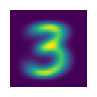

In [19]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

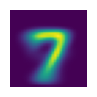

In [20]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

**Xatoliklarni o'lchash**

- Mean absolute difference(error) `MAE` yoki `L1 norm`
- Root Mean Squared Error `RMSE` yoki `L2 norm`

<Axes: >

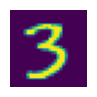

In [22]:
s_3 = stacked_threes[1]
show_image(s_3)

In [23]:
""" MAE va RMSE yordamida s_3 sample bilan ideal "3" orasidagi xatolik """
# MAE
mae = (s_3-mean3).abs().mean()

# RMSE
rmse = ((s_3-mean3)**2).mean().sqrt()

mae, rmse

(tensor(0.1114), tensor(0.2021))

In [24]:
""" MAE va RMSE yordamida s_3 sample bilan ideal "7" orasidagi xatolik """
# MAE
mae = (s_3-mean7).abs().mean()

# RMSE
rmse = ((s_3-mean7)**2).mean().sqrt()

mae, rmse

(tensor(0.1586), tensor(0.3021))

**NumPy Array va PyTorch Tensorlar** haqida qisqacha

NumPy ilm fanda va raqamli hisoblashlarda juda ham keng qo'llaniladigan kutubxonalardan biri hisoblanadi.

NumPydagi arraylar ham *PyTorch tensorlari* bilan deyarli bir xil, faqatgina **PyTorch GPU qurilmasida** tensorlar yordamida hisoblash va gradientlarni avtomatik hisoblash imkoniyatlari bilan Deep Learning sohasida Numpy arraydan ustun turadi.


Modelni aniqligini broadcasting orqali aniqlash

In [26]:
from PIL import Image

valid_3_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(i)) for i in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape, mean3.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]), torch.Size([28, 28]))

In [27]:
# mae xatolik funksiyasi
def mae(a, b):
  return (a-b).abs().mean((-1, -2))

# tekshirish
mae(s_3, mean3)

valid_3_errors = mae(valid_3_tens, mean3)
valid_7_errors = mae(valid_7_tens, mean7)

valid_3_errors, valid_3_errors.shape

(tensor([0.1745, 0.1173, 0.1285,  ..., 0.1229, 0.1605, 0.1107]),
 torch.Size([1010]))

In [28]:
# Natijalovchi funksiya

def is_3(x):
  return mae(x, mean3) < mae(x, mean7)

def is_7(x):
  return mae(x, mean7) < mae(x, mean3)

is_3(s_3), is_3(s_3).float()

(tensor(True), tensor(1.))

In [29]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = is_7(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

## **Gradient Descent**

3 va 7 raqamlarini klassifikatsiya qilishni, hech qanday machine learning ishtirokisiz amalga oshirib ko'rdik. Lekin biz qurgan dastur hech qanday o'rganish qobilyatiga emas, shunchaki ideal 3 yoki 7 ga solishtirilib natija qaytaradigan dastur xolos.

Endi shu masalani qanday qilib machine learning muommosiga aylantiramiz?

Buning javobini siz allaqchon bilasiz:

1-qismdagi darslarimizni eslang, u yerda vazn qo'llanilishi(weight assignment) haqida gapirgan edik. Aynan shu vazn qo'llab biz dasturimizni ishlash ko'rsatgichiga ta'sir o'tkazishimiz mumkin edi. Lekin ta'sirni qay darajada o'tkizishni (vaznni qay darajada kattaroq yoki kichikroq qo'llashni nazarda tutayapmiz) esa moshinaning tajribasidan kelib chiqib qo'llar edik.


3 va 7 raqamlarini machine learning klassifikatoriga aylantirish uchun quyidagi qadamlar zarur bo'ladi:

(1) Boshlang'ich vaznlarni(weights) yaratib olish

(2) Har bir rasm uchun, 1-qadamda yaratib olingan vaznlardan foydalanib 3 yoki 7 ekanligini boshorat qilish

(3) 2-qadamdan olingan bashorat yordamida modelni qay darajada yaxshi ishlayotganligini (lossni) hisoblash demakdir

(4) Gradientni hisoblash, bu hisoblash har bir vazn qiymatining o'zgarishi lossning qiymatiga ta'sirini o'lchash imkoniyatini beradi

(5) Step orqali, 4-qadamda hisoblangan o'zgarish qiymatiga ko'ra vaznlarni qiymatini yangilaymiz

(6) 2-qadamga qaytib, yana shu jarayonni bir necha marotaba qaytaramiz

(7) Yuqoridagi jarayonlarni, vaznlarimiz optimal qiymatlarni topmaguncha qaytaraverish (yoki trainingni kerakli aniqlikga yetgach to'xtatish)

### Boshlang'ich vaznlarni(weights) yaratib olish

Bu qadamda shunchaki vazn qiymatlarni taxminiy `random` qiymatlar orqali yaratib olishimiz mumkin

###  Har bir rasm uchun bashorat

Bashoratni eng oddiy chiziqli tenglama yordamida amalga oshiramiz:

### `y=wx+b`

bu yerda:
- `w` vazn
- `x` rasmlardagi piksellar
- `b` bias

###  `Loss`ni hisoblash

Loss bu xatolikni o'lchash mezoni.  bo'lib, uning qiymati orqali biz modelimiz qay darajada yaxshi o'qitilayotganini aniqlashimiz mumkin bo'ladi

### Step

Shunchaki `gradient`dan aniqlangan natijaga ko'ra vazn `w`larning qiymatlarini ortirish yoki kamaytirishni dastlab aniqlab olib, undan so'ng qiymatlarni sekin astalik bilan o'zgartiradi.

### Stop

Bu o'qitish jarayonini bizning istaklarimizga ko'ra to'xtatish jarayoni hisoblanadi.

In [43]:
import torch
import numpy as np

def loss(w):
  return w**2



def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = np.linspace(min, max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)



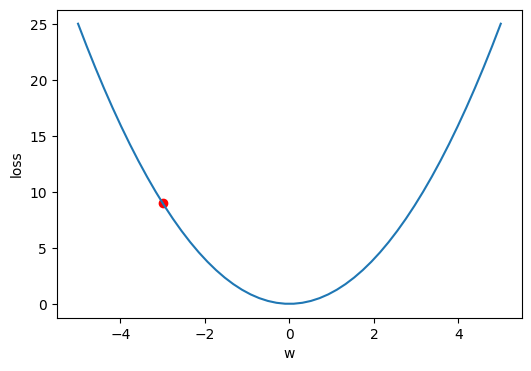

In [44]:
plot_function(loss, 'w', 'loss', min=-5, max=5)
plt.scatter(-3, loss(-3), color='red')

In [45]:
#@title Tangent Line of Parabola { display-mode: "both" }
def parabola_tangent_liner(w):
  # calculating parabola(quadratic)
  def loss(w):
    return w**2

  # slope of the parabola
  def slope(w):
    return 2*w
  # range for plotting parabola
  w_range = np.linspace(-5, 5, 100)

  w = w # assign user defined value
  loss_v = loss(w) # get the value for the user-defined point

  # tangent line according to # y = slope*(x - x1) + y1
  def line(w_range, w, loss_v):
    return slope(w)*(w_range-w)+loss_v

  # range for plotting line
  line_range = np.linspace(w-1, w+1, 20)

  # plotting
  plt.plot(w_range, loss(w_range), color='blue')
  plt.scatter(w, loss_v, color='r', s=50)
  plt.plot(line_range, line(line_range, w, loss_v), 'r--')
  plt.xlabel('w')
  plt.ylabel('loss')

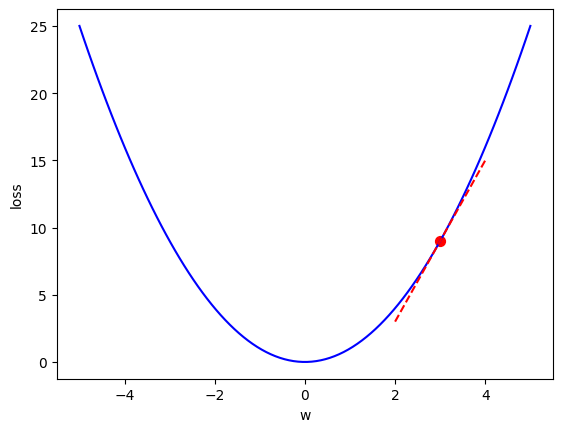

In [46]:
parabola_tangent_liner(3)

**Gradientni hisoblash**

In [47]:
w_t = torch.tensor(3., requires_grad=True)

loss_v = loss(w_t)

loss_v.backward()

Loss funksiya : w**2 qonuniyatiga bo'ysunadi, bu funksiyaning hosilasi 2*w bo'ladi.

In [48]:
w_t.grad

tensor(6.)

**Step with learning rate**

Parameterlar(vaznlar)ni gradient qiymatlariga ko'ra o'zgaritirish deep learning jarayonining asosiy qismlaridan biri hisoblanadi. Bu qadamda, deyarli barcha usullar bir xil bo'ladi, ya'ni gradient qiymati kichik bo'lgan raqamlar(lr)ga ko'paytirilib, undan so'ng parameter(vazn) qiymati ortirilib yoki kamaytirilib qo'yiladi (quyida formulalar keltirilgan).

lr - Learning Rate (O'rganish qadami). Odatda juda kichik sonlardan iborat 0.001 dan 0.1 oralig'ida

### `w = w+lr*w.grad` yoki `w = w-lr*w.grad`

### Python dasturlash tilida: `w += lr*w.grad` yoki `w -= lr*w.grad`

In [52]:
from IPython.display import Image
Image(url='https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png', height=300)

Stochastic Gradient Descent uchun (to'liq misol) - End-to-End SGD Example

Yuqoridagi misolda, qanday qilib Gradient Descent orqali loss qiymatini minimallashtirish mumkinligini ko'rib chiqdik. Navbat, qanday qilib lossni minimallashtirish orqali modelimizni yaxshiroq o'rganishiga misol keltirishga yetib keldi. Bu misol Stochastic Gradient Descent (SGD)ga asoslangan bo'ladi. Stochastic Gradient Descent ham Gradient Descentning bir ko'rinishi bo'lib, bu haqida batafsilroq misolimizdan keyin muhokama qilamiz.


davomi : https://jovian.com/mansurbek-comchemai/4dl